In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print(np.round(model.named_steps['linear'].coef_, 2))

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

[-1.61]
0.40772896250986845
[  0.47 -17.79  23.59  -7.26]
0.04320874987231825
[-2.98293000e+03  1.03899500e+05 -1.87416382e+06  2.03716564e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562771e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08]
182663732.5630359


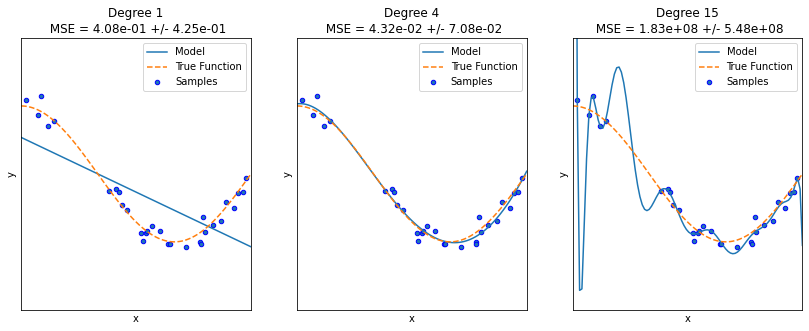

In [18]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_feature = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipline = Pipeline([('polynomial_feature', polynomial_feature),
                       ('linear_regression', linear_regression)])
    pipline.fit(X.reshape(-1,1),y)
    score = cross_val_score(pipline, X.reshape(-1,1),y,scoring='neg_mean_squared_error', cv=10)
    print(np.round(pipline.named_steps['linear_regression'].coef_, 2))
    print(-1*np.mean(score))
    
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, pipline.predict(X_test[:,np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True Function')
    plt.scatter(X,y,edgecolors='b', s=20, label='Samples')
    plt.xlabel("x")
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {}\n MSE = {:.2e} +/- {:.2e}'.format(degrees[i], -score.mean(), score.std()))